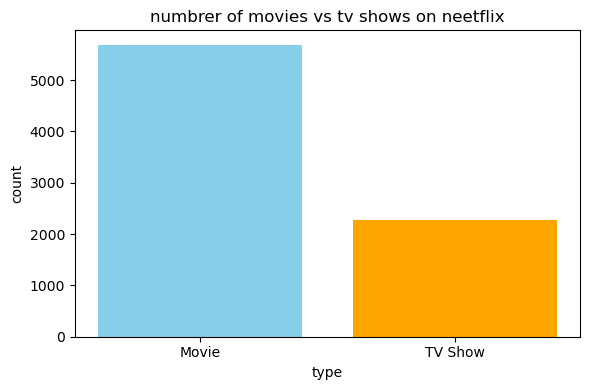

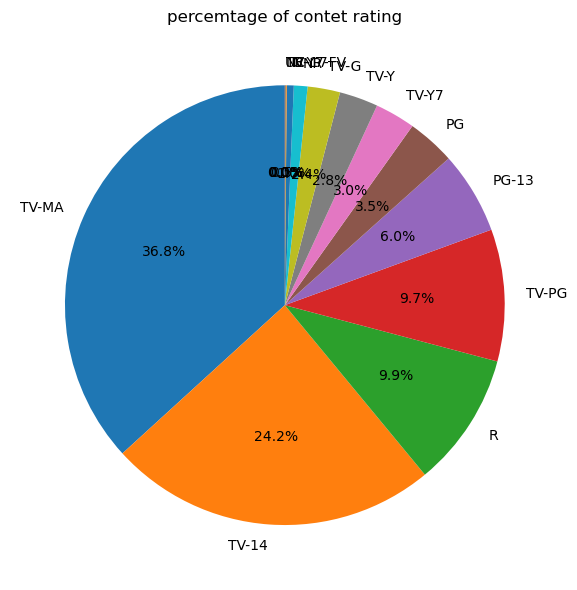

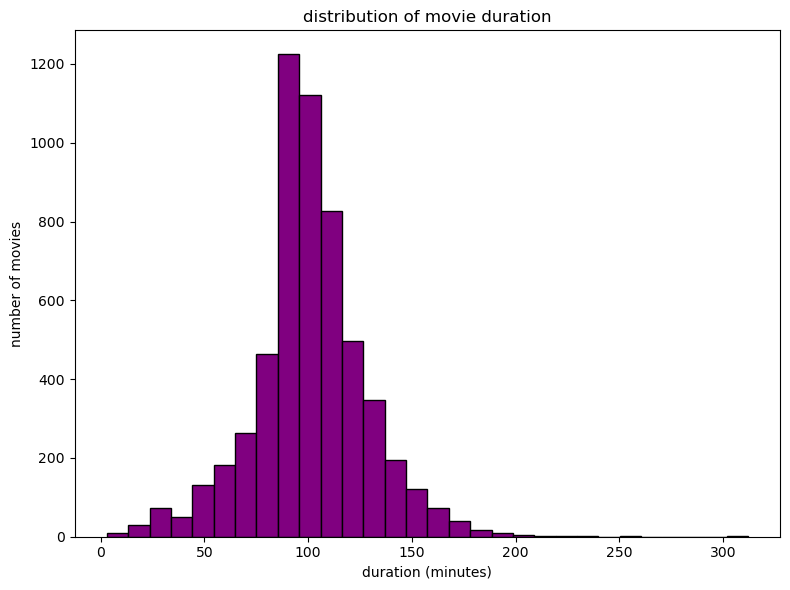

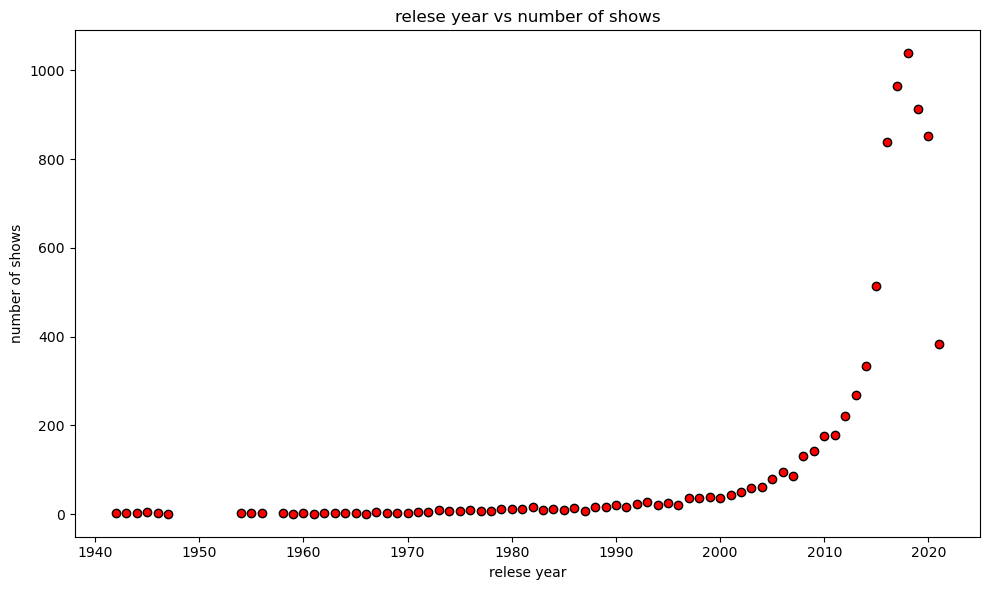

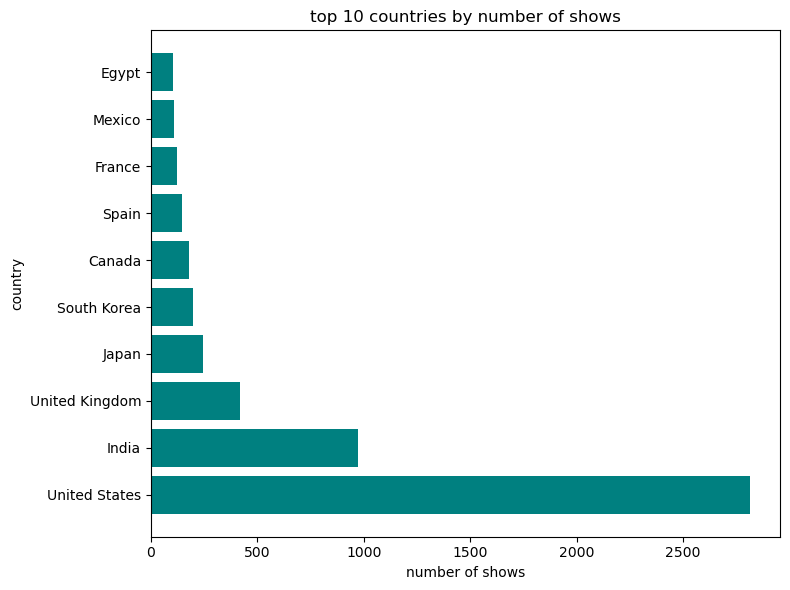

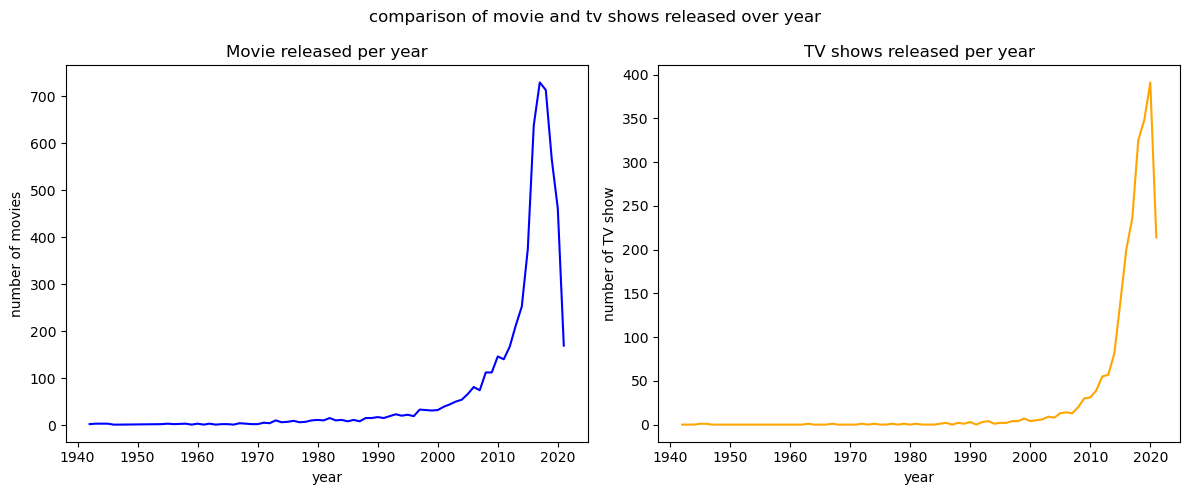

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
#load the data
df=pd.read_csv("/home/ismita/Downloads/netflix/netflix_titles.csv")
#clean
df=df.dropna(subset=['type','release_year','rating','country','duration'])
type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','orange'])
plt.title('numbrer of movies vs tv shows on neetflix')
plt.xlabel('type')
plt.ylabel('count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()
rating_counts=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index, autopct='%1.1f%%',startangle=90)
plt.title('percemtage of contet rating')
plt.tight_layout()
plt.savefig('content_rating_pie.png')
plt.show()
movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30, color='purple',edgecolor='black')
plt.title("distribution of movie duration")
plt.xlabel('duration (minutes)')
plt.ylabel('number of movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()
release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red',edgecolor='black')
plt.title("relese year vs number of shows")
plt.xlabel('relese year')
plt.ylabel('number of shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()
country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values, color='teal')
plt.title("top 10 countries by number of shows")
plt.xlabel('number of shows')
plt.ylabel('country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()
content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(content_by_year.index,content_by_year['Movie'], color='blue')
ax[0].set_title('Movie released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('number of movies')
ax[1].plot(content_by_year.index,content_by_year['TV Show'], color='orange')
ax[1].set_title('TV shows released per year')
ax[1].set_xlabel('year')
ax[1].set_ylabel('number of TV show')
fig.suptitle('comparison of movie and tv shows released over year')
plt.tight_layout()
plt.savefig('movie_tv_comparison.png')
plt.show()
